In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [ ]:
df = pd.read_csv("./processed/backwarda.csv")
df.head()

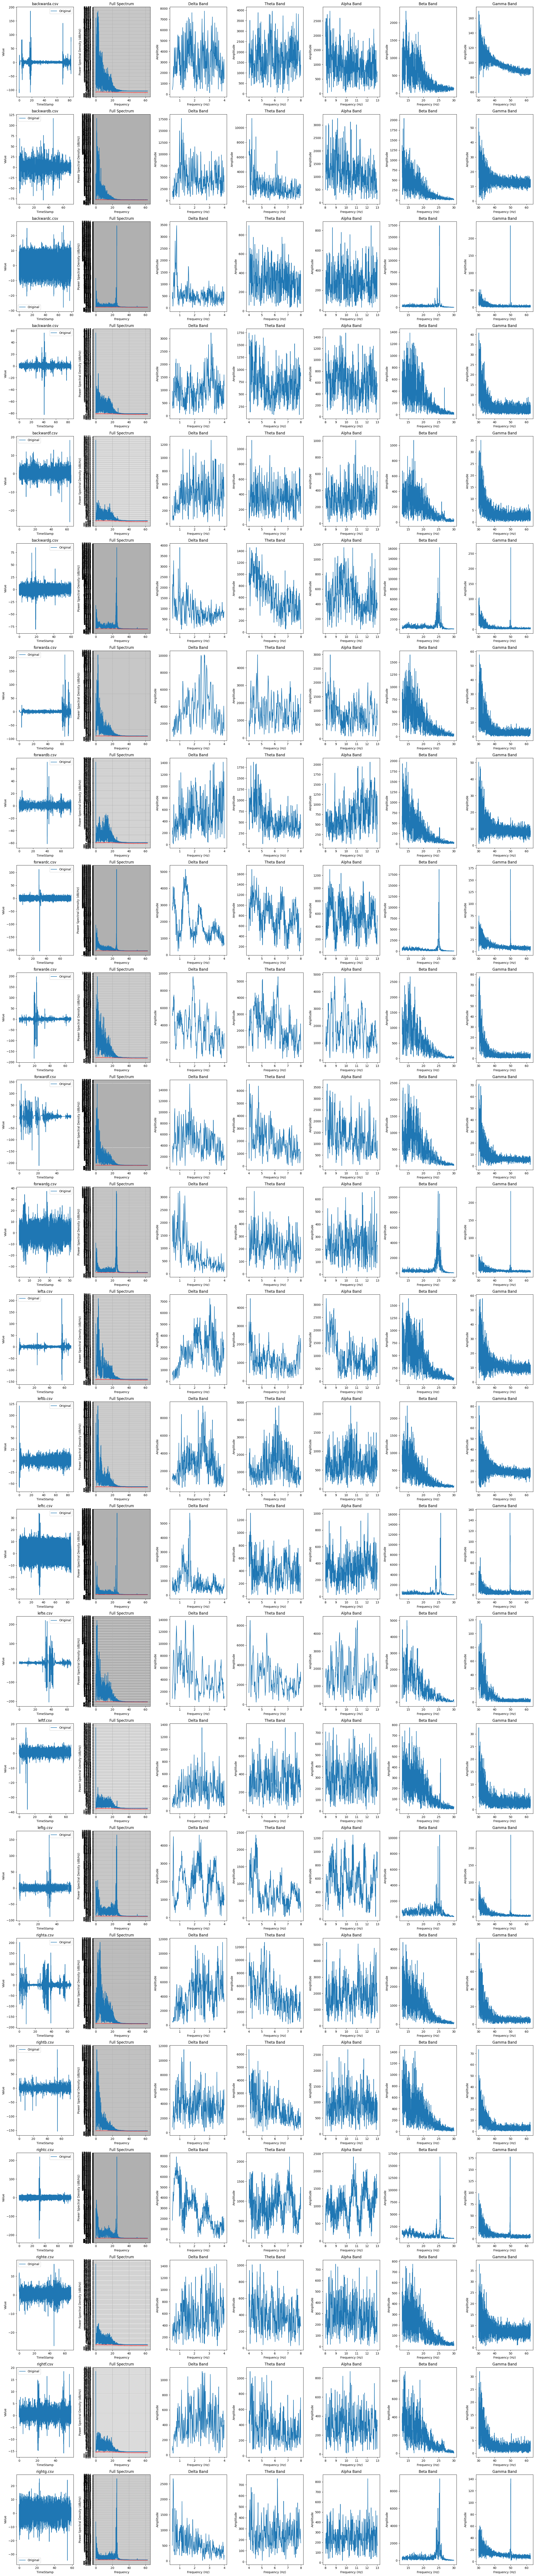

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the directory containing CSV files
directory = './processed'

# Get list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Define frequency bands
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 100)
}

# Create subplots
num_plots = len(csv_files)
fig, axes = plt.subplots(num_plots, len(bands)+2, figsize=(5*len(bands), 5*num_plots))

# Plot each CSV file and its Fourier transform
for i, file in enumerate(csv_files):
    # Read CSV file
    data = pd.read_csv(os.path.join(directory, file))
    
    # Compute Fourier transform
    y = data['Value']
    N = len(y)
    dt = 1 / 125  # Sampling interval
    freq = np.fft.fftfreq(N, dt)[:N//2]  # Frequencies
    y_fft = np.fft.fft(y)[:N//2]  # Fourier transform
    
    # Plot original data
    axes[i, 0].plot(data['timestamp'], data['Value'], label='Original')
    axes[i, 0].set_title(file)
    axes[i, 0].set_xlabel('TimeStamp')
    axes[i, 0].set_ylabel('Value')
    axes[i, 0].legend()

    # Plot Fourier transform
    axes[i, 1].plot(freq, np.abs(y_fft))
    axes[i, 1].set_title('Full Spectrum')
    axes[i, 1].set_xlabel('Frequency (Hz)')
    axes[i, 1].set_ylabel('Amplitude')

    # Plot Power Spectral Density
    axes[i, 1].psd(y, Fs=125, NFFT=N, color='r', alpha=0.5)

    # Plot filtered bands
    for j, (band_name, (low, high)) in enumerate(bands.items()):
        band_mask = (freq >= low) & (freq <= high)
        band_freq = freq[band_mask]
        band_fft = y_fft[band_mask]
        axes[i, j+2].plot(band_freq, np.abs(band_fft))
        axes[i, j+2].set_title(f'{band_name} Band')
        axes[i, j+2].set_xlabel('Frequency (Hz)')
        axes[i, j+2].set_ylabel('Amplitude')

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig("see.svg")
plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the directory containing CSV files
directory = './processed'

# Get list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Create subplots for PSD
num_plots = len(csv_files)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))

# Plot each CSV file and its PSD
for i, file in enumerate(csv_files):
    # Read CSV file
    data = pd.read_csv(os.path.join(directory, file))
    
    # Compute PSD
    y = data['Value']
    axes[i].psd(y, Fs=125, NFFT=len(y), color='r', alpha=0.5)
    axes[i].set_title(f'PSD of {file}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Power/Frequency (dB/Hz)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the directory containing CSV files
directory = './processed'

# Get list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Create subplots for spectrograms
num_plots = len(csv_files)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))

# Plot each CSV file and its spectrogram
for i, file in enumerate(csv_files):
    # Read CSV file
    data = pd.read_csv(os.path.join(directory, file))
    
    # Compute spectrogram
    y = data['Value']
    Fs = 125  # Sampling frequency
    NFFT = 256  # Length of the windowing segments
    noverlap = NFFT // 2  # Overlap between windows
    spec, freqs, times, _ = plt.specgram(y, NFFT=NFFT, Fs=Fs, noverlap=noverlap)
    
    # Plot spectrogram
    axes[i].imshow(spec, aspect='auto', cmap='viridis', origin='lower', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    axes[i].set_title(f'Spectrogram of {file}')
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Frequency (Hz)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np

# Path to the directory containing CSV files
directory = "./processed"

# Get list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith(".csv")]

# Loop through each CSV file to calculate sampling rate
for file in csv_files:
    # Read CSV file
    data = pd.read_csv(os.path.join(directory, file))

    # Extract timestamps
    timestamps = data["timestamp"]

    # Calculate time difference between consecutive samples
    time_diff = np.diff(timestamps)

    # Calculate the average time difference (sampling period)
    sampling_period = np.mean(time_diff)

    # Calculate the sampling rate (samples per second)
    sampling_rate = 1 / sampling_period

    # Print sampling rate
    print(f"Sampling rate for {file}: {sampling_rate} Hz")

    # Validate the sampling rate (should be close to the expected value)
    expected_sampling_rate = 125  # Expected sampling rate
    if abs(sampling_rate - expected_sampling_rate) < 1:  # Acceptable deviation
        print("Sampling rate validated.")
    else:
        print("Sampling rate validation failed.")

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.signal import welch

# Path to the directory containing CSV files
directory = './processed'

# Get list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Loop through each CSV file
for file in csv_files:
    # Read CSV file
    data = pd.read_csv(os.path.join(directory, file))
    
    # Compute FFT
    y = data['Value']
    N = len(y)
    dt = 1 / 125  # Sampling interval
    freq = np.fft.fftfreq(N, dt)[:N//2]  # Frequencies
    y_fft = np.fft.fft(y)[:N//2]  # Fourier transform
    
    # Compute eigenvalues
    fft_real = np.real(y_fft)
    fft_imag = np.imag(y_fft)
    cov_matrix = np.cov(fft_real, fft_imag)
    eigenvalues = np.linalg.eigvals(cov_matrix)
    
    # Compute PSD (Power Spectral Density)
    f, psd = welch(y, fs=125, nperseg=256)  # Adjust parameters as needed
    
    # Compute statistics
    mean_value = np.mean(fft_real)
    max_value = np.max(fft_real)
    std_dev = np.std(fft_real)
    print(len(y_fft))
    print(len(data['timestamp']))
    # Create a DataFrame for this file
    df = pd.DataFrame({
        'timestamp': data['timestamp'],
        'FFT_values': y_fft,
        'Eigenvalues': eigenvalues,
        'PSD_values': psd,
        'Mean': mean_value,
        'Max': max_value,
        'Std_dev': std_dev
    })
    
    # Merge this DataFrame with the result DataFrame
    result_df = pd.concat([result_df, df], ignore_index=True)

# Sort the DataFrame by timestamp
result_df = result_df.sort_values(by='timestamp')

# Display the resulting DataFrame
print(result_df)


In [ ]:
df

In [3]:
import pandas as pd
import numpy as np
from scipy.fft import fft

def sliding_window_with_timestamp(data, window_size, stride):
    timestamps = data['timestamp'].values
    values = data['Value'].values
    for i in range(0, len(timestamps) - window_size + 1, stride):
        window_timestamps = timestamps[i:i+window_size]
        window_values = values[i:i+window_size]
        yield window_timestamps, window_values

def compute_fft(signal):
    return np.abs(fft(signal))

def compute_statistics(signal):
    mean = np.mean(signal)
    max_val = np.max(signal)
    std_dev = np.std(signal)
    ptp = np.ptp(signal)
    rms = np.sqrt()
    return mean, max_val, std_dev

def process_window(start_timestamp, end_timestamp, window_values):
    fft_result = compute_fft(window_values)
    mean, max_val, std_dev = compute_statistics(window_values)
    
    return start_timestamp, end_timestamp, fft_result, mean, max_val, std_dev

def process_data_with_sliding_window(df, window_size, stride, sampling_rate):
    results = []
    timestamps = df['timestamp'].values
    window_duration = window_size / sampling_rate  # Calculate window duration
    for i, (window_timestamps, window_values) in enumerate(sliding_window_with_timestamp(df, window_size, stride)):
        start_timestamp = window_timestamps[0]
        end_timestamp = window_timestamps[-1]
        result = process_window(start_timestamp, end_timestamp, window_values)
        results.append(result)
    return results, window_duration

# Define parameters
window_size = 100  # adjust according to your preference
stride = 50        # adjust according to your preference
sampling_rate = 125  # Hz

# Process data using sliding window approach
df = pd.read_csv("./processed/backwarda.csv")
results, window_duration = process_data_with_sliding_window(df, window_size, stride, sampling_rate)

# Print or use results as needed
for result in results:
    start_timestamp, end_timestamp, fft_result, mean, max_val, std_dev = result
    print("Window Timestamps:", start_timestamp, "-", end_timestamp)
    print("Window Duration (seconds):", window_duration)
    print("FFT Result:", fft_result)
    print("Mean:", mean)
    print("Max:", max_val)
    print("Standard Deviation:", std_dev)
    print("\n")


TypeError: sqrt() takes from 1 to 2 positional arguments but 0 were given

In [202]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft
from scipy.stats import kurtosis, skew

def sliding_window_with_timestamp(data, window_size, stride):
    timestamps = data['timestamp'].values
    values = data['Value'].values
    for i in range(0, len(timestamps) - window_size + 1, stride):
        window_timestamps = timestamps[i:i+window_size]
        window_values = values[i:i+window_size]
        yield window_timestamps, window_values

def compute_fft(signal):
    return np.abs(fft(signal))

def compute_statistics(signal):
    mean = np.mean(signal)
    max_val = np.max(signal)
    std_dev = np.std(signal)
    rms = np.sqrt(np.mean(signal**2))
    kurt = kurtosis(signal)
    skewness = skew(signal)
    peak_to_peak = np.ptp(signal)
    abs_diff_signal = np.sum(np.abs(np.diff(signal)))
    return mean, max_val, std_dev, rms, kurt, skewness, peak_to_peak, np.mean(abs_diff_signal)

def compute_eeg_frequency_bands(fft_result, sampling_rate):
    freq_bins = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
    alpha_band = (8, 12)
    beta_band = (12, 30)
    gamma_band = (30, 100)
    delta_band = (0.5, 4)
    theta_band = (4, 8)

    alpha_idx = np.where((freq_bins >= alpha_band[0]) & (freq_bins <= alpha_band[1]))[0]
    beta_idx = np.where((freq_bins >= beta_band[0]) & (freq_bins <= beta_band[1]))[0]
    gamma_idx = np.where((freq_bins >= gamma_band[0]) & (freq_bins <= gamma_band[1]))[0]
    delta_idx = np.where((freq_bins >= delta_band[0]) & (freq_bins <= delta_band[1]))[0]
    theta_idx = np.where((freq_bins >= theta_band[0]) & (freq_bins <= theta_band[1]))[0]

    alpha_power = np.sum(fft_result[alpha_idx])
    beta_power = np.sum(fft_result[beta_idx])
    gamma_power = np.sum(fft_result[gamma_idx])
    delta_power = np.sum(fft_result[delta_idx])
    theta_power = np.sum(fft_result[theta_idx])

    return alpha_power, beta_power, gamma_power, delta_power, theta_power

def process_window(start_timestamp, end_timestamp, window_values):
    fft_result = compute_fft(window_values)
    statistics = compute_statistics(window_values)
    alpha_power, beta_power, gamma_power, delta_power, theta_power = compute_eeg_frequency_bands(fft_result, 125)
    return start_timestamp, end_timestamp, fft_result, *statistics, alpha_power, beta_power, gamma_power, delta_power, theta_power

def adjust_window_parameters(window_duration, sampling_rate):
    window_size = int(window_duration * sampling_rate)
    stride = window_size // 2
    return window_size, stride

def process_data_with_sliding_window(df, window_duration, sampling_rate):
    window_size, stride = adjust_window_parameters(window_duration, sampling_rate)
    results = []
    timestamps = df['timestamp'].values
    for i, (window_timestamps, window_values) in enumerate(sliding_window_with_timestamp(df, window_size, stride)):
        start_timestamp = window_timestamps[0]
        end_timestamp = window_timestamps[-1]
        result = process_window(start_timestamp, end_timestamp, window_values)
        results.append(result)
    return results

def generate_training_matrix(directory, output_file):
    training_files = os.listdir(directory)
    
    window_duration = 1  # seconds, adjust according to your preference
    sampling_rate = 125  # Hz

    all_results = []
    for file in training_files:
        state = None
        if "backward" in file.lower():
            state = 0
        elif "right" in file.lower():
            state = 2
        elif "left" in file.lower():
            state = 1
        elif "forward" in file.lower():
            state = 3
        df = pd.read_csv(os.path.join(directory, file))
        results = process_data_with_sliding_window(df, window_duration, sampling_rate=sampling_rate)
        for result in results:
            lis = list(result)
            lis.append(state)
            result = tuple(lis)
            all_results.append(result)
            
    result_df = pd.DataFrame(all_results, columns=['Start Timestamp', 'End Timestamp', 'FFT Result', 'Mean', 'Max', 'Standard Deviation', 'RMS', 'Kurtosis', 'Skewness', 'Peak-to-Peak', 'Abs Diff Signal', 'Alpha Power', 'Beta Power', 'Gamma Power', 'Delta Power', 'Theta Power', 'Label'])
    fft_columns = [f'FFT_{i}' for i in range(125)]
    result_df[fft_columns] = pd.DataFrame(result_df['FFT Result'].tolist())
    result_df.drop('FFT Result', axis=1, inplace=True)

    result_df.to_csv(output_file, index=False)

    return result_df

# Call the function
result = generate_training_matrix("./processed", "result.csv")


C:\Users\PMLS\AppData\Local\Temp\ipykernel_18180\2779081598.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[fft_columns] = pd.DataFrame(result_df['FFT Result'].tolist())
C:\Users\PMLS\AppData\Local\Temp\ipykernel_18180\2779081598.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[fft_columns] = pd.DataFrame(result_df['FFT Result'].tolist())
C:\Users\PMLS\AppData\Local\Temp\ipykernel_18180\2779081598.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

Accuracy: 0.5852601156069365


             Feature  Importance
9    Abs Diff Signal    0.020703
5                RMS    0.020435
35            FFT_25    0.020410
36            FFT_26    0.020170
110          FFT_100    0.019258
..               ...         ...
65            FFT_55    0.002888
81            FFT_71    0.002884
59            FFT_49    0.002880
79            FFT_69    0.002866
66            FFT_56    0.002811

[135 rows x 2 columns]


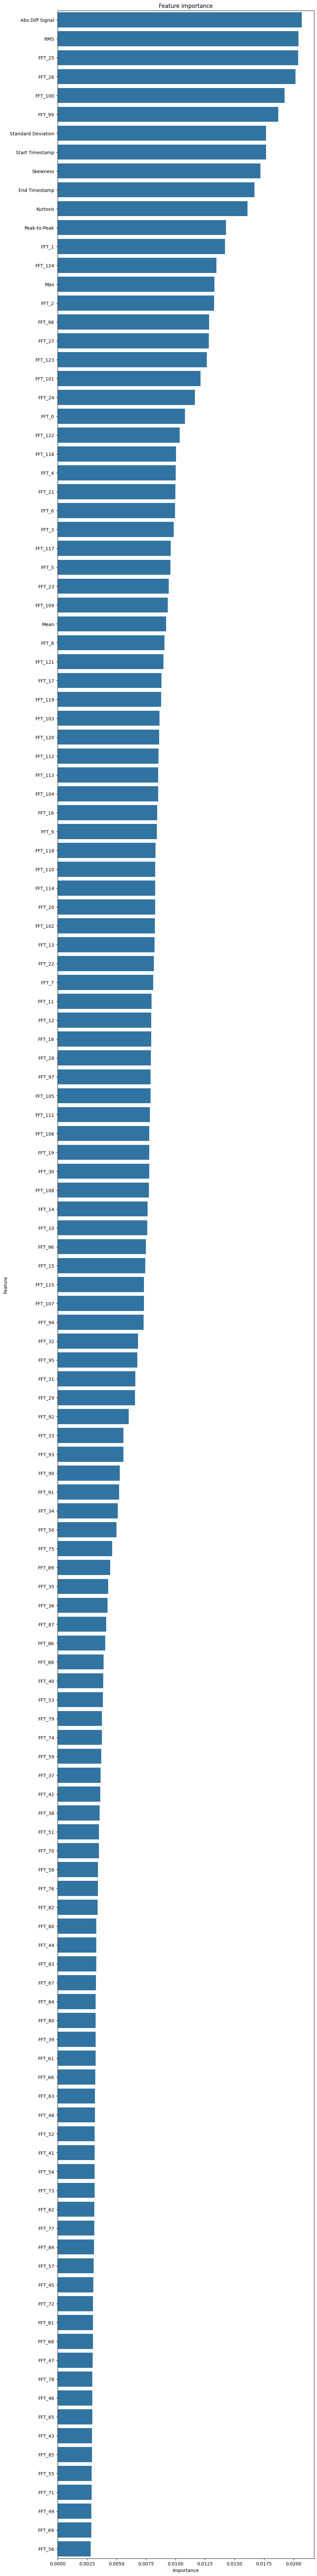

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 100))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Confusion Matrix:
 [[145  28  17  39]
 [ 34  64  24  26]
 [ 15  26  94  26]
 [ 31   9  17  97]]


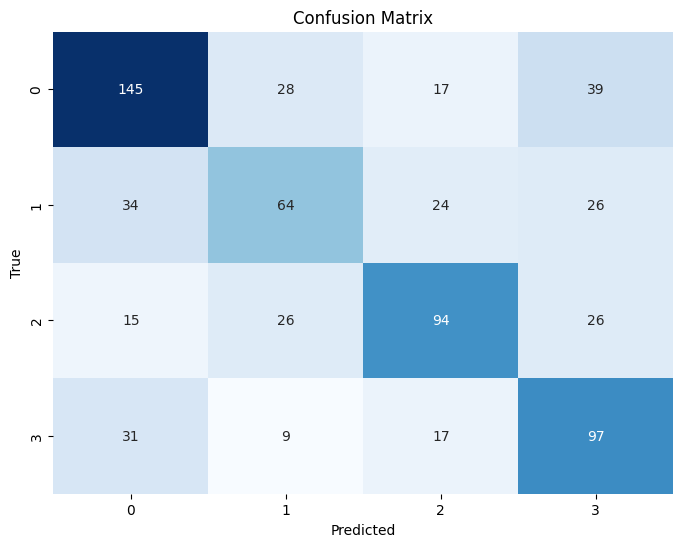

In [95]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)


# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [21]:
# For decision boundaries (for 2D or 3D data)
# Not applicable if the number of features is greater than 3
# Alternatively, dimensionality reduction techniques like PCA or t-SNE can be used

# For learning curves
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc='best')
plt.show()

KeyboardInterrupt: 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate 

In [26]:

clf=LogisticRegression()
gkf=GroupKFold(n_splits=5)
param_grid = {'classifier__C': [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]}
pipe=Pipeline([('scaler',StandardScaler()),('classifier',clf)])
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=16)
gscv.fit(X_train,y_train,groups=group_array)

c:\Users\PMLS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=16,
             param_grid={'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5,
                                           8, 10, 12, 15]})

In [27]:
gscv.best_score_

0.4

In [159]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

print(X_train.shape)
def cnnmodel(input_shape):
    clear_session()
    model=Sequential()
    model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=input_shape))#1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#2
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#4
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#6
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#8
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())#10
    model.add(Dense(4,activation='sigmoid'))#11
    
    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model


(2765, 138)


In [160]:
model=cnnmodel()
model.fit(X_train,y_train,epochs=50,batch_size=128, validation_split=.2)


TypeError: cnnmodel() missing 1 required positional argument: 'input_shape'

Epoch 1/50
87/87 [==============================] - 2s 16ms/step - loss: 1.3889 - accuracy: 0.2716
Epoch 2/50
87/87 [==============================] - 1s 13ms/step - loss: 1.3672 - accuracy: 0.2839
Epoch 3/50
87/87 [==============================] - 1s 10ms/step - loss: 1.3462 - accuracy: 0.3103
Epoch 4/50
87/87 [==============================] - 1s 10ms/step - loss: 1.3262 - accuracy: 0.3443
Epoch 5/50
87/87 [==============================] - 1s 12ms/step - loss: 1.2895 - accuracy: 0.3772
Epoch 6/50
87/87 [==============================] - 1s 10ms/step - loss: 1.2512 - accuracy: 0.4072
Epoch 7/50
87/87 [==============================] - 1s 11ms/step - loss: 1.2201 - accuracy: 0.4235
Epoch 8/50
87/87 [==============================] - 1s 12ms/step - loss: 1.1792 - accuracy: 0.4514
Epoch 9/50
87/87 [==============================] - 1s 10ms/step - loss: 1.1541 - accuracy: 0.4727
Epoch 10/50
87/87 [==============================] - 1s 10ms/step - loss: 1.1292 - accuracy: 0.4872
Epoch 11/

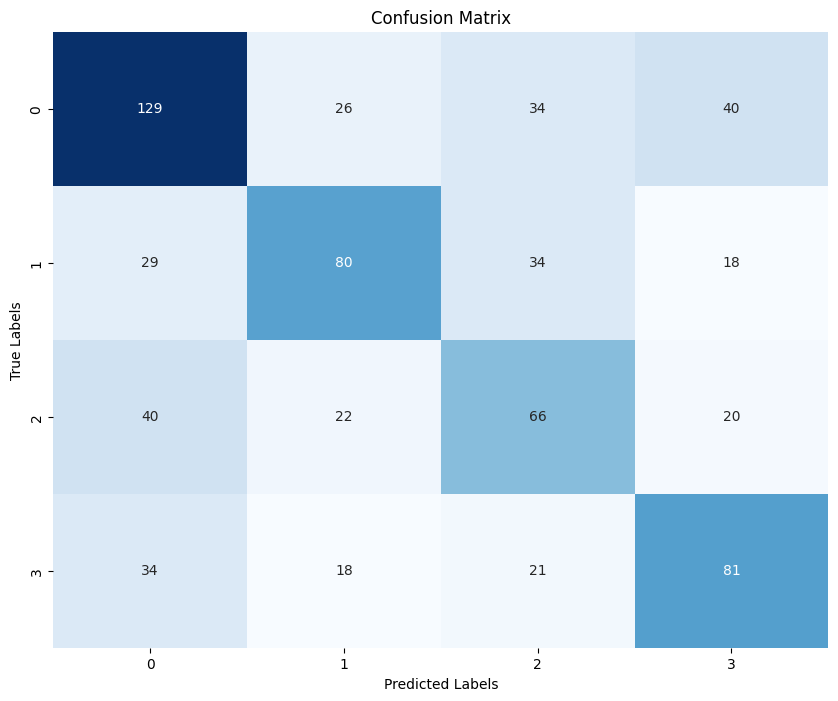

In [169]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    
    # Convolutional layers
    model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense (fully connected) layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Add dropout for regularization
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))  # Add dropout for regularization
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer
    
    return model

# Prepare the data
data = pd.read_csv('result2.csv')

# Split features and labels
X = data.drop(columns=['Start Timestamp', "End Timestamp", 'Label']).values
y = data['Label'].values

# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X to match the input shape expected by the CNN model
X = X.reshape(-1, 138, 1)

# Convert labels to one-hot encoded format
num_classes = len(np.unique(y))
y = tf.keras.utils.to_categorical(y, num_classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define input shape
input_shape = X_train.shape[1:]

# Create the CNN model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Plot confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/100
44/44 [==============================] - 7s 106ms/step - loss: 2.3315 - accuracy: 0.2796 - val_loss: 1.6759 - val_accuracy: 0.2153 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 5s 105ms/step - loss: 1.5962 - accuracy: 0.3226 - val_loss: 1.9004 - val_accuracy: 0.2240 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 5s 107ms/step - loss: 1.3690 - accuracy: 0.3425 - val_loss: 2.2503 - val_accuracy: 0.2153 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 6s 126ms/step - loss: 1.3371 - accuracy: 0.3505 - val_loss: 2.6183 - val_accuracy: 0.2182 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 5s 118ms/step - loss: 1.3038 - accuracy: 0.3732 - val_loss: 2.8578 - val_accuracy: 0.2211 - lr: 5.0000e-04
Epoch 6/100
 3/44 [=>............................] - ETA: 6s - loss: 1.2184 - accuracy: 0.4062

KeyboardInterrupt: 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
# Replace 'df' with your actual DataFrame name
df = pd.read_csv("result.csv")
df = df.drop(columns = ["Start Timestamp", "End Timestamp"])
df = df[[col for col in df.columns if col != 'Label'] + ['Label']]
# Define features (X) and target variable (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5512048192771084


In [3]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [4]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft
from scipy.stats import kurtosis, skew

def sliding_window_with_timestamp(data, window_size, stride):
    timestamps = data['timestamp'].values
    values = data['Value'].values
    for i in range(0, len(timestamps) - window_size + 1, stride):
        window_timestamps = timestamps[i:i+window_size]
        window_values = values[i:i+window_size]
        yield window_timestamps, window_values

def compute_fft(signal):
    return np.abs(fft(signal))

def compute_statistics(signal):
    mean = np.mean(signal)
    max_val = np.max(signal)
    std_dev = np.std(signal)
    rms = np.sqrt(np.mean(signal**2))
    kurt = kurtosis(signal)
    skewness = skew(signal)
    peak_to_peak = np.ptp(signal)
    abs_diff_signal = np.sum(np.abs(np.diff(signal)))
    return mean, max_val, std_dev, rms, kurt, skewness, peak_to_peak, np.mean(abs_diff_signal)

def compute_eeg_frequency_bands(fft_result, sampling_rate):
    freq_bins = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
    alpha_band = (8, 12)
    beta_band = (12, 30)
    gamma_band = (30, 100)
    delta_band = (0.5, 4)
    theta_band = (4, 8)

    alpha_idx = np.where((freq_bins >= alpha_band[0]) & (freq_bins <= alpha_band[1]))[0]
    beta_idx = np.where((freq_bins >= beta_band[0]) & (freq_bins <= beta_band[1]))[0]
    gamma_idx = np.where((freq_bins >= gamma_band[0]) & (freq_bins <= gamma_band[1]))[0]
    delta_idx = np.where((freq_bins >= delta_band[0]) & (freq_bins <= delta_band[1]))[0]
    theta_idx = np.where((freq_bins >= theta_band[0]) & (freq_bins <= theta_band[1]))[0]

    alpha_power = np.sum(fft_result[alpha_idx])
    beta_power = np.sum(fft_result[beta_idx])
    gamma_power = np.sum(fft_result[gamma_idx])
    delta_power = np.sum(fft_result[delta_idx])
    theta_power = np.sum(fft_result[theta_idx])

    return alpha_power, beta_power, gamma_power, delta_power, theta_power

def process_window(start_timestamp, end_timestamp, window_values):
    fft_result = compute_fft(window_values)
    statistics = compute_statistics(window_values)
    alpha_power, beta_power, gamma_power, delta_power, theta_power = compute_eeg_frequency_bands(fft_result, 125)
    return start_timestamp, end_timestamp, fft_result, *statistics, alpha_power, beta_power, gamma_power, delta_power, theta_power

def adjust_window_parameters(window_duration, sampling_rate):
    window_size = int(window_duration * sampling_rate)
    stride = window_size // 2
    return window_size, stride

def process_data_with_sliding_window(df, window_duration, sampling_rate):
    window_size, stride = adjust_window_parameters(window_duration, sampling_rate)
    results = []
    timestamps = df['timestamp'].values
    for i, (window_timestamps, window_values) in enumerate(sliding_window_with_timestamp(df, window_size, stride)):
        start_timestamp = window_timestamps[0]
        end_timestamp = window_timestamps[-1]
        result = process_window(start_timestamp, end_timestamp, window_values)
        results.append(result)
    return results

def generate_model_input(df):
    
    window_duration = 1  # seconds, adjust according to your preference
    sampling_rate = 125  # Hz
    results = process_data_with_sliding_window(df, window_duration, sampling_rate=sampling_rate)
            
    result_df = pd.DataFrame(results, columns=['Start Timestamp', 'End Timestamp', 'FFT Result', 'Mean', 'Max', 'Standard Deviation', 'RMS', 'Kurtosis', 'Skewness', 'Peak-to-Peak', 'Abs Diff Signal', 'Alpha Power', 'Beta Power', 'Gamma Power', 'Delta Power', 'Theta Power'])
    fft_columns = [f'FFT_{i}' for i in range(125)]
    result_df[fft_columns] = pd.DataFrame(result_df['FFT Result'].tolist())
    result_df.drop('FFT Result', axis=1, inplace=True)
    
    return result_df
from check import clean_csv
# Call the function
result = generate_model_input(clean_csv("./dataset/lefta.csv")).drop(columns=['Start Timestamp', "End Timestamp"])

C:\Users\PMLS\AppData\Local\Temp\ipykernel_2008\3911177689.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[fft_columns] = pd.DataFrame(result_df['FFT Result'].tolist())
C:\Users\PMLS\AppData\Local\Temp\ipykernel_2008\3911177689.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[fft_columns] = pd.DataFrame(result_df['FFT Result'].tolist())
C:\Users\PMLS\AppData\Local\Temp\ipykernel_2008\3911177689.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

In [5]:
result

Mean    Max  Standard Deviation        RMS  Kurtosis  Skewness  \
0   -1.94008  26.53           30.120589  30.183006  3.609067 -1.923705   
1   -2.23216  20.56            8.163469   8.463142  0.661358  1.322351   
2   -1.69672   6.39            5.572750   5.825324 -1.492188 -0.085436   
3    5.03216   7.02            2.371238   5.562859  0.101943 -1.152768   
4    6.19720   7.02            0.733511   6.240459 -0.985350 -0.624499   
..       ...    ...                 ...        ...       ...       ...   
159  0.68968   5.97            3.181633   3.255525 -0.987582 -0.272446   
160  1.01592  10.09            3.454832   3.601105 -0.530107  0.046676   
161  0.15856  14.22            8.241775   8.243300  1.825804 -1.340701   
162  0.23184  25.75           10.584794  10.587333  0.038372 -0.282347   
163  0.99520  25.75            8.184054   8.244341  0.529800  0.542236   

     Peak-to-Peak  Abs Diff Signal  Alpha Power   Beta Power  ...     FFT_115  \
0          136.84           204.03  1205.752892  1607.338270  ...  237.790452   
1           30.28            38.80   227.823945   448.906104  ...   44.295331   
2           16.11            16.61   163.738234   318.649312  ...   32.439161   
3            8.30             9.45    79.711007   159.990519  ...   16.449261   
4            2.34             3.57    17.430185    34.657760  ...    3.288911   
..            ...              ...          ...          ...  ...         ...   
159         12.03           134.36   223.097349   391.720701  ...   67.433970   
160         16.72           184.62   325.695351   679.092780  ...   49.838156   
161         42.16           250.89   440.821418   782.591225  ...   58.795957   
162         53.69           296.66   412.032314   882.682392  ...   73.443404   
163         43.03           282.45   445.797553   935.013872  ...   77.790939   

        FFT_116     FFT_117     FFT_118     FFT_119     FFT_120     FFT_121  \
0    264.376924  295.345862  336.737483  393.824387  469.955157  585.479846   
1     49.915725   55.452187   63.361122   74.665352   90.848103  112.943277   
2     36.144891   40.262516   45.270429   53.865685   65.215566   80.490928   
3     16.814762   19.890015   22.285721   27.086053   31.336451   38.970047   
4      3.617411    4.559092    4.741178    5.990614    7.031352    9.001152   
..          ...         ...         ...         ...         ...         ...   
159   20.864376   89.622850   72.811978   63.664125   83.090903   36.443087   
160   91.760942   65.919120   42.014969   19.491588    8.705483   19.789199   
161   81.336285  154.856304  150.507581   96.824657  286.596542  187.186679   
162  106.512253  136.618445  247.817484  173.918478  284.687533   58.758095   
163  145.239468   43.357389  100.756139   93.486522   43.072970  300.999693   

        FFT_122      FFT_123      FFT_124  
0    775.534162  1138.207589  1954.867013  
1    155.706170   249.347067   614.890518  
2    107.661839   166.661235   417.672556  
3     55.366783    75.773360   167.894435  
4     12.678156    20.795149    57.165102  
..          ...          ...          ...  
159   31.524346   162.361499    71.289580  
160   68.640941    26.312550   171.161740  
161  283.544683   416.712407   198.191628  
162  323.920763   687.805510   129.360726  
163  348.883171   402.800643   142.628381  

[164 rows x 138 columns]

In [6]:
model.predict([result.iloc[4]])

c:\Users\PMLS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)